In [17]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from statsmodels.graphics.tsaplots import plot_acf

In [37]:
co2_levels = pd.read_csv('datasets/ch2_co2_levels.csv', parse_dates=True, index_col='datestamp').dropna()
co2_levels = co2_levels.resample('M').mean().dropna()
co2_levels.tail()

,co2
datestamp,
2001-08-31,369.425
2001-09-30,367.880
2001-10-31,368.050
2001-11-30,369.375
2001-12-31,371.020


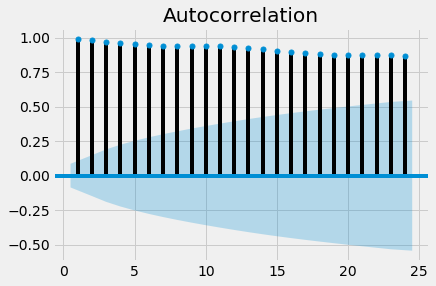

In [38]:
# Display the autocorrelation plot of your time series
#fig, ax = plt.figure(1,1, figsize=(12,8))
#co2_levels.plot()
fig = plot_acf(co2_levels['co2'].to_numpy(),zero=False, lags=24)

In [39]:
co2_levels['co2']

datestamp
1958-03-31    316.100000
1958-04-30    317.200000
1958-05-31    317.433333
1958-07-31    315.625000
1958-08-31    314.950000
                 ...    
2001-08-31    369.425000
2001-09-30    367.880000
2001-10-31    368.050000
2001-11-30    369.375000
2001-12-31    371.020000
Name: co2, Length: 521, dtype: float64

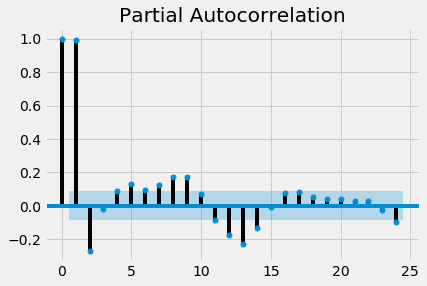

In [40]:
# Import required libraries
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from statsmodels.graphics import tsaplots 

# Display the partial autocorrelation plot of your time series
fig = tsaplots.plot_pacf(co2_levels['co2'], lags=24)

# Show plot
plt.show()

In [41]:
import statsmodels.api as sm

In [44]:
decomposition = sm.tsa.seasonal_decompose(co2_levels,period=12)

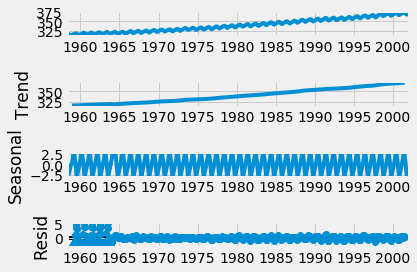

In [45]:
fig = decomposition.plot()

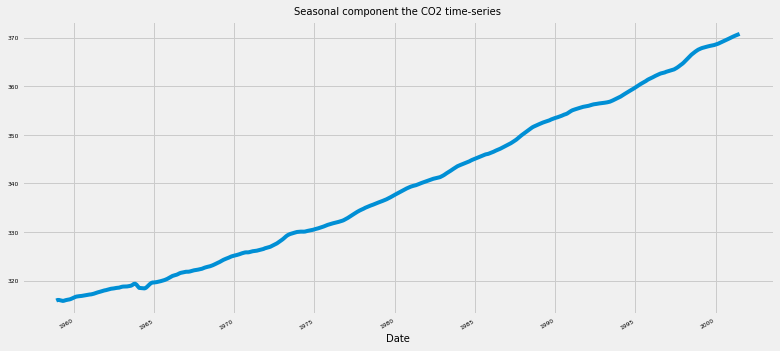

In [46]:
# Extract the trend component
trend = decomposition.trend

# Plot the values of the trend
ax = trend.plot(figsize=(12, 6), fontsize=6)

# Specify axis labels
ax.set_xlabel('Date', fontsize=10)
ax.set_title('Seasonal component the CO2 time-series', fontsize=10)
plt.show()

In [58]:
airline = pd.read_csv('datasets/ch3_airline_passengers.csv', parse_dates=True, index_col='Month')

In [59]:
airline.head()

,AirPassengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [49]:
airline.set_index('Month', inplace=True)

Text(0, 0.5, 'Number of Monthl')

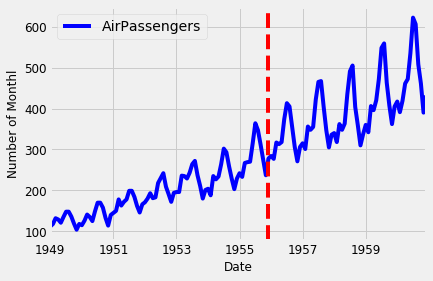

In [60]:
ax = airline.plot(color='blue', fontsize=12)
ax.axvline('1955-12', color='red', linestyle='--')
ax.set_xlabel('Date', fontsize=12)
ax.set_ylabel('Number of Monthl', fontsize=12)

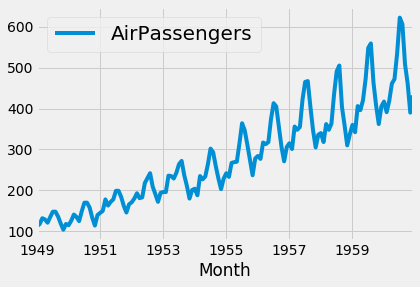

In [61]:
# Compute the mean number of passengers for each month of the year
mean_airline_by_month = airline.resample('M').mean()

# Plot the mean number of passengers for each month of the year
mean_airline_by_month.plot()
plt.legend(fontsize=20)
plt.show()